# A Core Investment Trading Strategy

- The price of an asset decreases when there is an increase in supply, and price increases when there is a surge in demand.

- When there is a contraction in price, we expect the fall to pause due to a concentration of demands. This virtual limit will be referred to as a __support line__. Since the price declines, the likelihood of finding buyers increases. 

- Conversely, when the price starts increasing, we might expect a pause in this increment due to a concentration of supplies. This is known as the __resistance line__. Since the price of the asset increases, there is a higher number of sellers willing to sell.

In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [2]:
def load_data(start_date, end_date, output_file):
    try:
        data_frame = pd.read_pickle(output_file)
        print("Successful search. Data found at position")
    except FileNotFoundError:
        print("No data found at position. Downloading the data from external source... \n Download complete!")
        data_frame = data.DataReader("AAPL", "yahoo", start_date, end_date)
        data_frame.to_pickle(output_file)
    return data_frame

In [3]:
apple_data = load_data(start_date = "2016-1-1", 
                       end_date = "2020-1-1", 
                      output_file = "apple_data.pkl")

No data found at position. Downloading the data from external source... 
 Download complete!


In [4]:
apple_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.220577
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.613626
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.151516
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.174416
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.291662
...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938187
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325806
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298737


In [5]:
# To enhance visibility, we will use only the last 600 trading days of data
apple_data = apple_data.tail(600)

In [6]:
lows = apple_data["Low"]
highs = apple_data["High"]

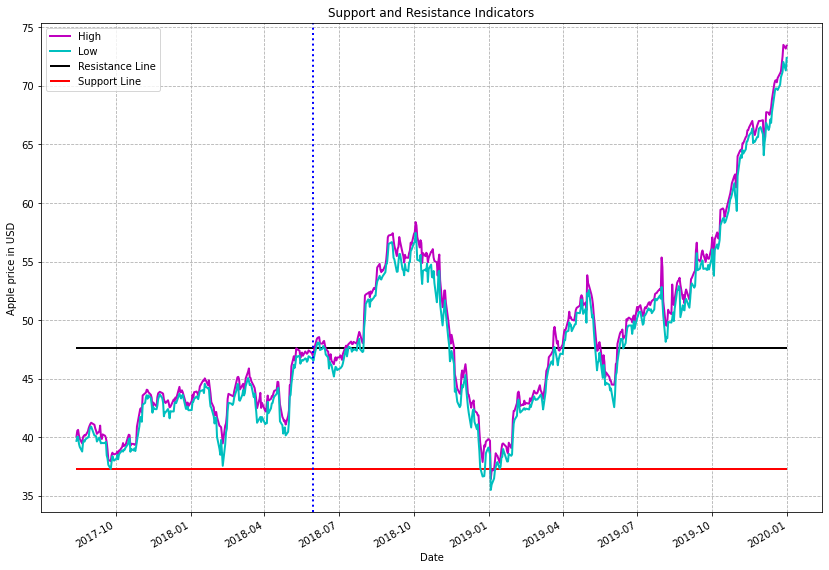

In [7]:
fig = plt.figure(figsize = (14, 10))
ax_1 = fig.add_subplot(111, ylabel = "Apple price in USD")
highs.plot(ax = ax_1, color = "m", lw = 2.0)
lows.plot(ax = ax_1, color = "c", lw = 2.0)

# Uses the maximum and minimum values within 200 days to creat the support and resistance limits.
plt.hlines(highs.head(200).max(), 
           xmin = highs.index.values[0], 
           xmax = highs.index.values[-1], 
           linewidth = 2,
           color = "k",
           label = "Resistance Line") # RESISTANCE LINE
plt.hlines(lows.head(200).min(),
          xmin = lows.index.values[0],
          xmax = lows.index.values[-1],
          linewidth = 2,
          color = "r",
          label = "Support Line") # SUPPORT LINE
plt.axvline(x = lows.index.values[200],
           linestyle = ":",
           linewidth = 2, 
           color = "b")
plt.title("Support and Resistance Indicators")
plt.legend()
plt.grid(linestyle = "--")
plt.show()

- After the 200th day (dotted vertical blue line), we will buy when we reach the support line, and sell when we reach the resistance line. We employed 200 days so that we have sufficient data points to get an estimate of the trend.

- The price of AAPL will reach the resitance line around the 200th day, which means that we can have a signal to enter a short position (sell). 

- Once traded, we will wait to get out of this short position  when the AAPL price will reach the support (red) line.

- With this historical data, we can see that applying such a strategy, would have resulted in considerable profits if we had exited our position around January 2019, when the price reached the support line.

- This idea based on support/resistance has strong grounds in terms of economical behavior, but keep in mind that that doesn't mean that it will work with all assets or at any point in time.

We can demonstrate the last point using the same strategy for GOOG, on a similar period.

In [8]:
def load_data(start_date, end_date, output_file):
    try:
        data_frame = pd.read_pickle(output_file)
        print("Successful search. Data found at position")
    except FileNotFoundError:
        print("No data found at position. Downloading the data from external source... \n Download complete!")
        data_frame = data.DataReader("GOOG", "yahoo", start_date, end_date)
        data_frame.to_pickle(output_file)
    return data_frame
    
google_data = load_data(start_date = "2014-1-1",
                        end_date = "2018-1-1",
                        output_file = "google_data.pkl")

No data found at position. Downloading the data from external source... 
 Download complete!


In [9]:
google_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


In [10]:
# To enhance visibility, we will use only the last 600 trading days of data
google_data = google_data.tail(600)

In [11]:
google_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-14,659.854980,652.659973,655.010010,657.119995,1072100.0,657.119995
2015-08-17,661.380005,651.239990,656.799988,660.869995,1051700.0,660.869995
2015-08-18,664.000000,653.460022,661.900024,656.130005,1456100.0,656.130005
2015-08-19,667.000000,654.190002,656.599976,660.900024,2134100.0,660.900024
2015-08-20,662.989990,642.900024,655.460022,646.830017,2855300.0,646.830017
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


In [12]:
lows = google_data["Low"]
highs = google_data["High"]

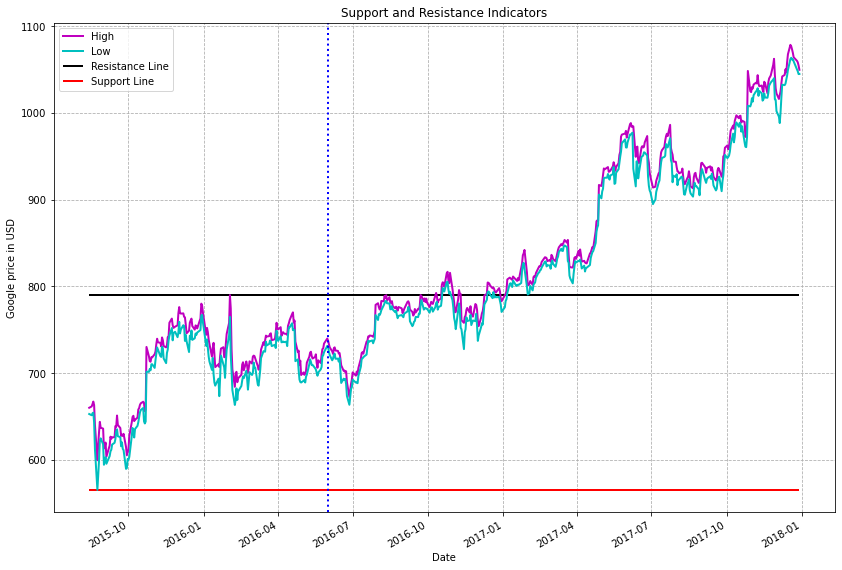

In [13]:
fig = plt.figure(figsize = (14, 10))
ax_1 = fig.add_subplot(111, ylabel = "Google price in USD")
highs.plot(ax = ax_1, color = "m", lw = 2.0)
lows.plot(ax = ax_1, color = "c", lw = 2.0)

# Uses the maximum and minimum values within 200 days to creat the support and resistance limits.
plt.hlines(highs.head(200).max(), 
           xmin = highs.index.values[0], 
           xmax = highs.index.values[-1], 
           linewidth = 2,
           color = "k",
           label = "Resistance Line") # RESISTANCE LINE
plt.hlines(lows.head(200).min(),
          xmin = lows.index.values[0],
          xmax = lows.index.values[-1],
          linewidth = 2,
          color = "r",
          label = "Support Line") # SUPPORT LINE
plt.axvline(x = lows.index.values[200],
           linestyle = ":",
           linewidth = 2, 
           color = "b")
plt.title("Support and Resistance Indicators")
plt.legend()
plt.grid(linestyle = "--")
plt.show()

- In this case, notice that the price of GOOG will reach the resitance line around august 2016, which means that we can have a signal to enter a short position (sell).

- Once traded, we will exit this short position when the price of GOOG will cross the support line.

- It is clear that this will not happen because of the systematic growth of GOOG. That means that the trading strategy will not exit the short position on GOOG since the price does not go back to the support level.

- We would then have to carry a short position for a rising price of GOOG, which would result in a considerable loss.

- This means that we need to modify this strategy to make it work.

- POTENTIAL SOLUTION: Moving the support resistance line to adapt to the evolution of the price. This will be crucial to the success of the strategy.
 
- This phase is critical when creating a trading strategy. You will start by observing how you trading idea performs when applied to historical data, and then you will increase the number of paramters to adjust to more realistic backtest cases.

In our example, we can incorporate two additional parameters:
 - The minimum number of times that a price needs to reach the support/reistance level.
 - A tolerance margin of what we consider being close to the support/resistance level.

In [14]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt

In [15]:
def load_data(start_date, end_date, output_file):
    try:
        data_frame = pd.read_pickle(output_file)
        print("Successful search. Data found at position")
    except FileNotFoundError:
        print("No data found at position. Downloading the data from external source... \n Download complete!")
        data_frame = data.DataReader("GOOG", "yahoo", start_date, end_date)
        data_frame.to_pickle(output_file)
    return data_frame
    
google_data = load_data(start_date = "2014-1-1",
                        end_date = "2018-1-1",
                        output_file = "google_data.pkl")

Successful search. Data found at position


In [16]:
google_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656454.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345894.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551864.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124336.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501811.0,568.484192
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


In [17]:
google_signal = pd.DataFrame(index = google_data.index)
google_signal

""
Date
2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08
...
2017-12-22
2017-12-26
2017-12-27


In [18]:
google_signal["price"] = google_data["Adj Close"]

In [19]:
google_signal

,price
Date,
2014-01-02,554.481689
2014-01-03,550.436829
2014-01-06,556.573853
2014-01-07,567.303589
2014-01-08,568.484192
...,...
2017-12-22,1060.119995
2017-12-26,1056.739990
2017-12-27,1049.369995


In [20]:
def trading_support_resistance(data, bin_width = 20):
    data["support_tolerance"] = pd.Series(np.zeros(len(data)))
    data["resistance_tolerance"] = pd.Series(np.zeros(len(data)))
    data["support_count"] = pd.Series(np.zeros(len(data)))
    data["resistance_count"] = pd.Series(np.zeros(len(data)))
    data["support"] = pd.Series(np.zeros(len(data)))
    data["resistance"] = pd.Series(np.zeros(len(data)))
    data["positions"] = pd.Series(np.zeros(len(data)))
    data["signal"] = pd.Series(np.zeros(len(data)))
    in_support = 0
    in_resistance = 0
    
    for i in range((bin_width - 1) + bin_width, len(data)):
        data_section = data[i - bin_width: i + 1]
        support_level = min(data_section["price"])
        resistance_level = max(data_section["price"])
        range_level = resistance_level - support_level
        data["resistance"][i] = resistance_level
        data["support"][i] = support_level
        data["support_tolerance"][i] = support_level + 0.2 * range_level
        data["resistance_tolerance"] = resistance_level - 0.2 * range_level
        
        if data["price"][i] >= data["resistance_tolerance"][i] and data["price"][i] <= data["resistance"][i]:
            in_resistance += 1
            data["resistance_count"][i] = in_resistance
        elif data["price"][i] <= data["support_tolerance"][i] and data["price"][i] >= data["support"][i]:
            in_support += 1
            data["support_count"][i] = in_support
        else:
            in_support = 0
            in_resistance = 0
        
        if in_resistance > 2:
            data["signal"][i] = 1
        elif in_support > 2:
            data["signal"][i] = 0
        else:
            data["signal"][i] = data["signal"][i - 1]
            
    data["positions"] = data["signal"].diff()
    
# Calls the function using the google_signal dataset    
trading_support_resistance(google_signal) 

In the above code, the following applies:

- The __trading support resistance__ function defines the time window in the price that is used to calculate the resistance support levels.

- The level of support and resistance is calculated by taking the maximum and minimum price and then subtracting and adding a 20% margin.

- As previously, we use __diff__ to know when to place the orders.

- __When the price is below the support, we will enter a long position. When the price is above the resistance, we will enter a short position. For that, we will have 1 for a long position and 0 for a short position.__


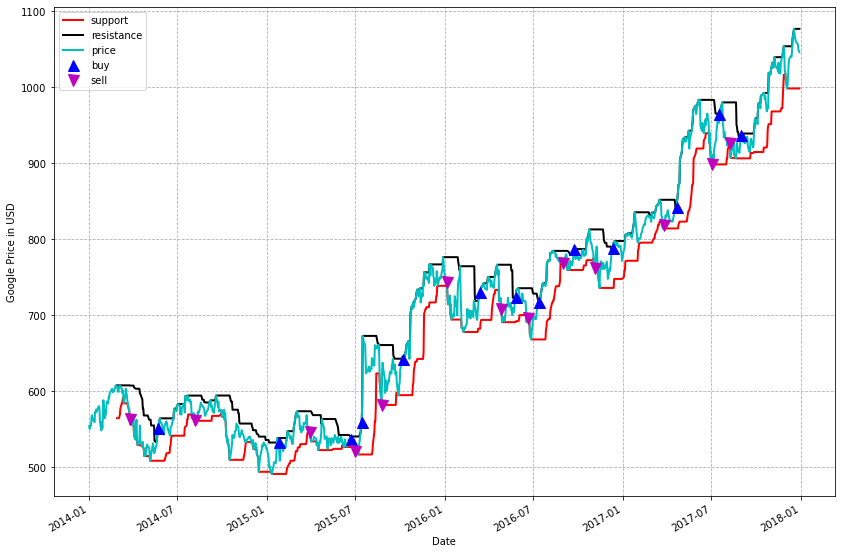

In [21]:
fig = plt.figure(figsize = (14, 10))
ax_1 = fig.add_subplot(111, ylabel = "Google Price in USD")
google_signal ["support"].plot(ax = ax_1, color = "r", lw = 2.0)
google_signal["resistance"].plot(ax = ax_1, color = "k", lw = 2.0)
google_signal["price"].plot(ax = ax_1, color = "c", lw = 2.0)

ax_1.plot(google_signal.loc[google_signal["positions"] == 1.0].index,
         google_signal.loc[google_signal["positions"] == 1.0]["price"],
         "^", markersize = 11, color = "b", label = "buy")

ax_1.plot(google_signal.loc[google_signal["positions"] == -1.0].index,
         google_signal.loc[google_signal["positions"] == -1.0]["price"],
         "v", markersize = 11, color = "m", label = "sell")
plt.legend()
plt.grid(linestyle = "--")
plt.show()

The plot shows a 20-day rolling window calculating resistance and support.

- A buy order is sent when the resistance tolerance margin for 2 consecutive days, and that a sell order is sent when a price stays in the support tolerance margin for 2 consecutive days.


`End of File`